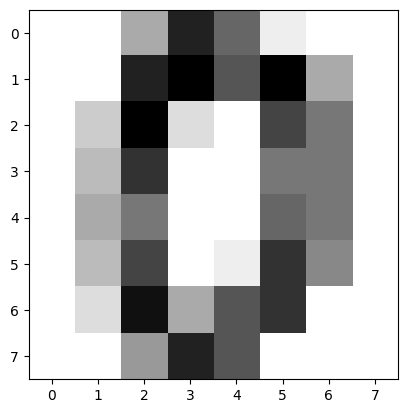

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

In [5]:
 from tensorflow.keras import layers, models

In [20]:
#x.shape[1]은 특징의 수 이다. -> 직접 특징의 수를 세어서 적어도 됨
#y.shape는 최종 분류할 때 클래스의  개수이다. -> 직접 분류할 클래스의 개수를 세어서 적어도 됨
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(data.shape[1],)),
    #layers.Dropout(0.3),     -> 과적합을 막기 위한 과정으로 학습할 때 30%만큼 랜덤으로 샘플을 죽인다. (테스트 할때는 풀어줌)
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [21]:
print(data.shape, digits.images.shape)

(1797, 64) (1797, 8, 8)


In [22]:
#검증 세트를 편리하게 만듬
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2663 - loss: 4.6289 - val_accuracy: 0.7014 - val_loss: 0.9518
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.7592 - val_accuracy: 0.8854 - val_loss: 0.4068
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9109 - loss: 0.3327 - val_accuracy: 0.9271 - val_loss: 0.2652
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9413 - loss: 0.2196 - val_accuracy: 0.9375 - val_loss: 0.2160
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9519 - loss: 0.1759 - val_accuracy: 0.9410 - val_loss: 0.1915
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9560 - loss: 0.1616 - val_accuracy: 0.9479 - val_loss: 0.1670
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.1005 - val_accuracy: 0.9444 - val_loss: 0.1467
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9764 - loss: 0.0923 - val_accuracy: 0.9410 - val_loss:

In [30]:
import numpy as np
y_pred = model.predict(X_test)

y_test_class = y_test #t_test는 원래가 1차원 배열이므로 argmax를 쓸 필요가 없다.
y_pred_class = np.argmax(y_pred, axis=1) #y_pred는 2차원 배열이므로 채점을 위해 정답 번호를 뽑아내는 과정이 필요하다.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


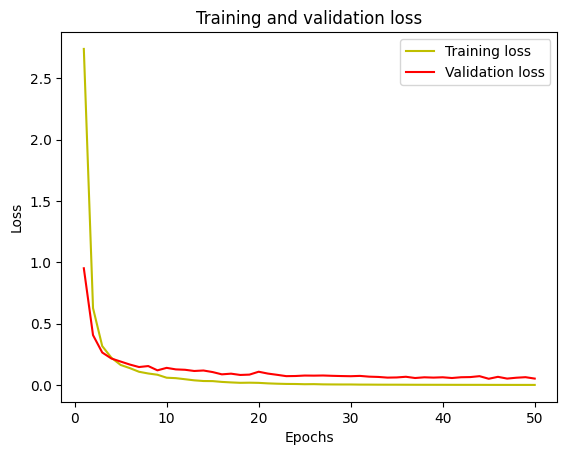

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

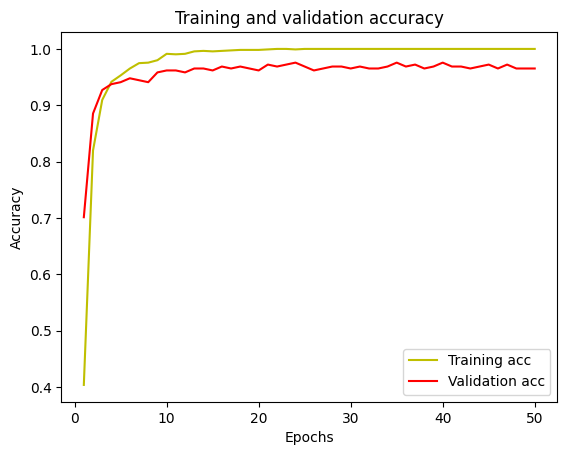

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.93      1.00      0.96        38
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        38
           4       0.94      0.97      0.96        34
           5       0.94      0.94      0.94        33
           6       1.00      1.00      1.00        37
           7       0.97      0.94      0.95        32
           8       0.97      0.92      0.94        37
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  1  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  1 31  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0